<a href="https://colab.research.google.com/github/marcia09maria/IA-FINANCAS/blob/main/Ativ_1%20-%20Analise%20exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar bibliotecas: a primeira para manipulação dos dados e a segunda
# para criar os gráficos
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Importa a biblioteca yfinance: acesso a dados de ações e mercados financeiros
import yfinance as yf


In [ ]:
# lista com códigos de algumas ações
tickers = ['VALE3.SA', 'PETR4.SA', 'ITUB4.SA']
# Baixa os dados históricos com preços de fechamento
dados = yf.download(tickers, start='2017-01-01', end='2024-12-31')['Close']

# Mostra as primeiras linhas dos dados para conferir se foram baixados corretos
print("\nPrimeiras linhas dos dados:")
print(dados.head())
#teste 14 06

/tmp/ipython-input-4-3697321335.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(tickers, start='2017-01-01', end='2024-12-31')['Close']
[*********************100%***********************]  3 of 3 completed


Primeiras linhas dos dados:
Ticker       ITUB4.SA  PETR4.SA   VALE3.SA
Date                                      
2017-01-02  20.001701  4.383852  17.651823
2017-01-03  20.848774  4.635040  18.433685
2017-01-04  20.938255  4.635040  18.102625
2017-01-05  21.224590  4.709799  18.792919
2017-01-06  21.296173  4.682886  18.292812


In [ ]:
dados

Ticker,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,
2017-01-02,20.001701,4.383852,17.651823
2017-01-03,20.848774,4.635040,18.433685
2017-01-04,20.938255,4.635040,18.102625
2017-01-05,21.224590,4.709799,18.792919
2017-01-06,21.296173,4.682886,18.292812
...,...,...,...
2024-12-20,28.330072,35.772045,54.619999
2024-12-23,27.781458,35.781754,54.849998
2024-12-26,27.961332,34.723640,55.009998


In [ ]:
# Mostra a quantidade de valores ausentes (faltando) em cada coluna dos dados
print("\nValores ausentes por coluna:")
print(dados.isnull().sum())


Valores ausentes por coluna:
Ticker
ITUB4.SA    0
PETR4.SA    0
VALE3.SA    0
dtype: int64


Vamos calcular os retornos

In [ ]:
# Calcula os retornos percentuais diários das ações
# (variação percentual de um dia para o outro)
retornos = dados.pct_change()
# Exibe os retornos calculados
retornos

Ticker,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,
2017-01-02,NaN,NaN,NaN
2017-01-03,0.042350,0.057298,0.044294
2017-01-04,0.004292,0.000000,-0.017960
2017-01-05,0.013675,0.016129,0.038132
2017-01-06,0.003373,-0.005714,-0.026611
...,...,...,...
2024-12-20,0.011561,-0.008342,0.015808
2024-12-23,-0.019365,0.000271,0.004211
2024-12-26,0.006475,-0.029571,0.002917


In [ ]:
Agora a primeira linha contém NAs porque não há retorno para ela. Vamos removê-la do data frame

In [ ]:
# Remove linhas com valores ausentes nos retornos percentuais
# feito porque a primeira linha não tem um retorno calculado
retornos = retornos.dropna()
retornos

Ticker,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,
2017-01-03,0.042350,0.057298,0.044294
2017-01-04,0.004292,0.000000,-0.017960
2017-01-05,0.013675,0.016129,0.038132
2017-01-06,0.003373,-0.005714,-0.026611
2017-01-09,0.004762,-0.021073,0.020408
...,...,...,...
2024-12-20,0.011561,-0.008342,0.015808
2024-12-23,-0.019365,0.000271,0.004211
2024-12-26,0.006475,-0.029571,0.002917


In [ ]:
# Mostra estatísticas descritivas dos retornos:
# média(mean), desvio padrão (std), valores mínimos (min) e máximos (max)
# e percentis que mostram a distribuição dos retornos
# Essa análise ajuda a entender o comportamento histórico de cada ativo,
# incluindo risco (volatilidade) e potencial de retorno.
print("\nEstatísticas descritivas dos retornos:")
print(retornos.describe())


Estatísticas descritivas dos retornos:
Ticker     ITUB4.SA     PETR4.SA     VALE3.SA
count   1991.000000  1991.000000  1991.000000
mean       0.000344     0.001422     0.000847
std        0.019018     0.027069     0.023618
min       -0.179643    -0.296978    -0.245592
25%       -0.010268    -0.010999    -0.011625
50%        0.000000     0.001091     0.000000
75%        0.010802     0.014334     0.012415
max        0.110593     0.222222     0.213579


Alternativamente, podemos calcular as quantidades manualmente

In [ ]:
estatisticas = []

# Para cada coluna (ação) nos retornos ele vai:
for coluna in retornos.columns:
   # Remover valores ausentes da série de retornos da ação
    serie = retornos[coluna].dropna()

    # Calcular medidas estatísticas
    media = serie.mean()
    mediana = serie.median()
    desvio_padrao = serie.std()
    maximo = serie.max()
    minimo = serie.min()
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    variancia = serie.var()
    assimetria = serie.skew()
    curtose = serie.kurtosis()

    # Adicionar os resultados a lista, organizados por ação
    estatisticas.append({
        'Ação': coluna,
        'Média': media,
        'Mediana': mediana,
        'Desvio Padrão': desvio_padrao,
        'Máximo': maximo,
        'Mínimo': minimo,
        'Q1': Q1,
        'Q3': Q3,
        'Variância': variancia,
        'Assimetria': assimetria,
        'Curtose': curtose
    })

# Cria um DataFrame com os resultados
# Converte a lista de estatísticas em uma tabela organizada para facilitar
# a visualização e análise
tabela_estatisticas = pd.DataFrame(estatisticas)

# Arredonda os valores para duas casas decimais para facilitar a leitura
tabela_estatisticas = tabela_estatisticas.round(2)

# Mostra a tabela
print(tabela_estatisticas.to_string(index=False))

    Ação  Média  Mediana  Desvio Padrão  Máximo  Mínimo    Q1   Q3  Variância  Assimetria  Curtose
ITUB4.SA    0.0      0.0           0.02    0.11   -0.18 -0.01 0.01        0.0        -0.4     7.15
PETR4.SA    0.0      0.0           0.03    0.22   -0.30 -0.01 0.01        0.0        -1.1    16.42
VALE3.SA    0.0      0.0           0.02    0.21   -0.25 -0.01 0.01        0.0         0.0    12.99


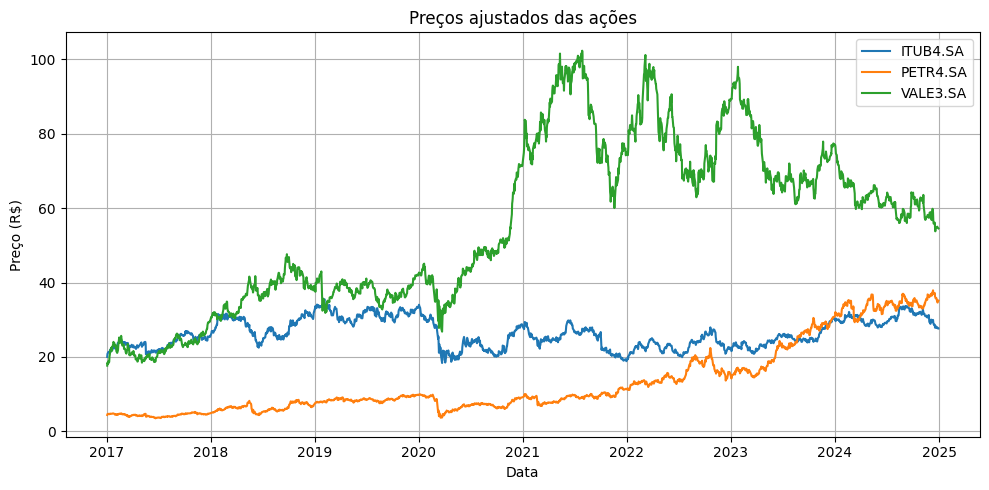

In [ ]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(10, 5))
# Plota a série de preços das ações ao longo do tempo
plt.plot(dados)
# Adiciona título ao gráfico
plt.title('Preços ajustados das ações')
# Adiciona nome aos eixos X e Y e legenda
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend(dados.columns)
# Adiciona grade para facilitar a leitura dos valores
plt.grid(True)
# Ajusta os elementos para não cortar nada na figura e exibe o gráfico
plt.tight_layout()
plt.show()

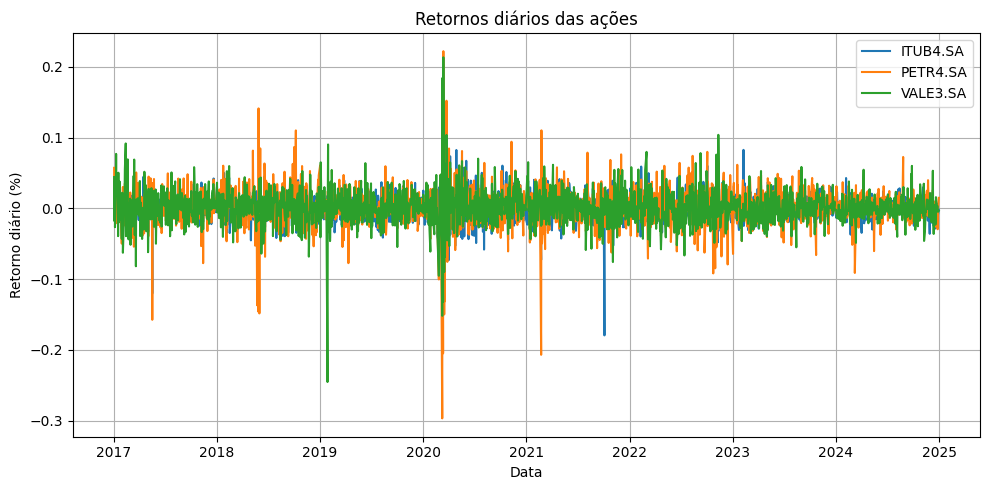

In [ ]:
# Gráfico de retornos diários - Este gráfico mostra a variação percentual diária
# dos preços de cada ativo. Picos e vales acentuados indicam maior volatilidade.
plt.figure(figsize=(10, 5))
plt.plot(retornos)
plt.title('Retornos diários das ações')
plt.xlabel('Data')
plt.ylabel('Retorno diário (%)')
plt.legend(retornos.columns)
plt.grid(True)
plt.tight_layout()
plt.show()

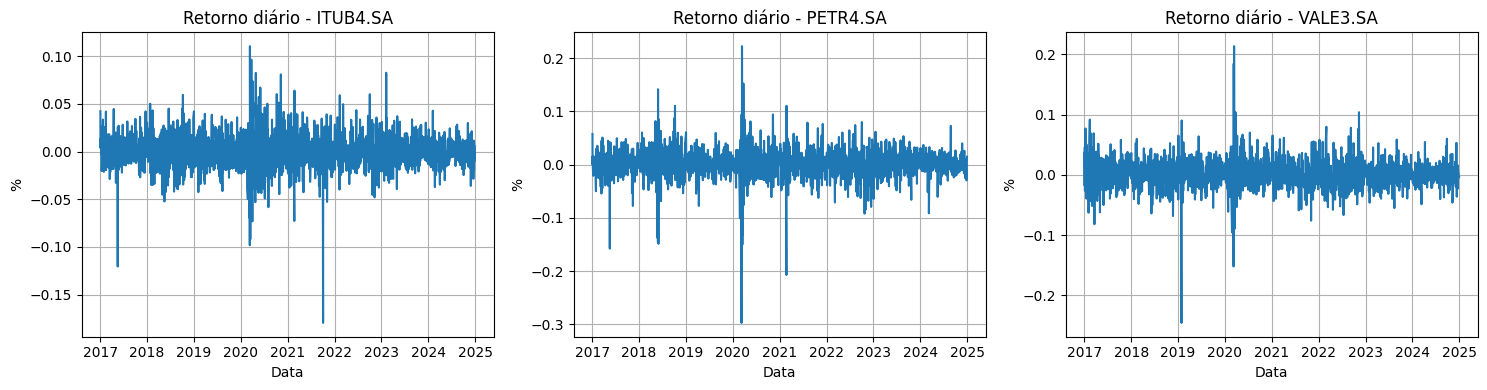

In [ ]:
plt.figure(figsize=(15, 4))  # largura aumentada para caber os 3 gráficos

# Lista de nomes das colunas
colunas = retornos.columns

# Cria 3 subgráficos lado a lado
# Este loop gera gráficos individuais para os retornos diários de cada ativo,
# mostrando a variação percentual ao longo do tempo em subgráficos separados.
for i in range(3):
    plt.subplot(1, 3, i + 1)  # 1 linha, 3 colunas, posição i+1
    plt.plot(retornos[colunas[i]])
    plt.title(f'Retorno diário - {colunas[i]}')
    plt.xlabel('Data')
    plt.ylabel('%')
    plt.grid(True)

plt.tight_layout()
plt.show()

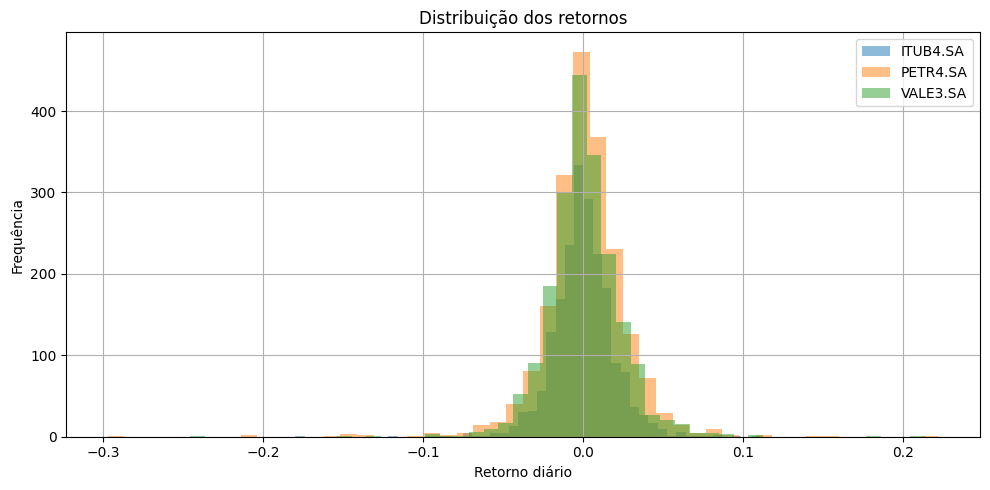

In [ ]:
# Histograma dos retornos - Este gráfico mostra a distribuição de frequência
# dos retornos diários para cada ativo. Picos altos e estreitos indicam
# retornos mais concentrados, enquanto espalhamento maior sugere mais
# volatilidade.
plt.figure(figsize=(10, 5))
for coluna in retornos.columns:
    plt.hist(retornos[coluna], bins=50, alpha=0.5, label=coluna)
plt.title('Distribuição dos retornos')
plt.xlabel('Retorno diário')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

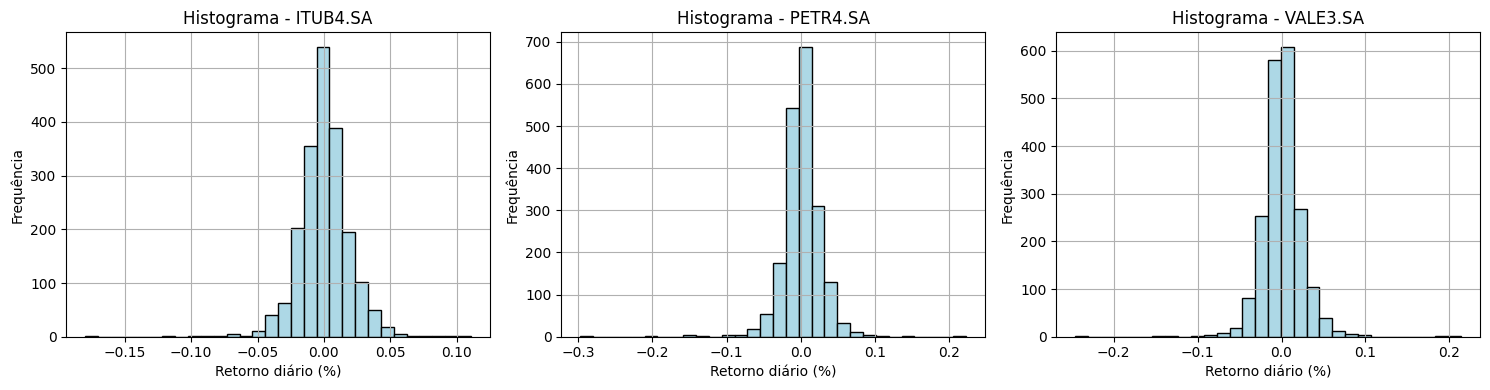

In [ ]:
plt.figure(figsize=(15, 4))

colunas = retornos.columns

# Este loop cria histogramas individuais para os retornos diários de cada ativo,
# permitindo visualizar a frequência de diferentes valores de retorno.
# Isso ajuda a entender a distribuição dos retornos e a identificar a
# presença de "caudas" (retornos extremos) ou assimetrias.

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.hist(retornos[colunas[i]].dropna(), bins=30, color='lightblue', edgecolor='black')
    plt.title(f'Histograma - {colunas[i]}')
    plt.xlabel('Retorno diário (%)')
    plt.ylabel('Frequência')
    plt.grid(True)

plt.tight_layout()
plt.show()

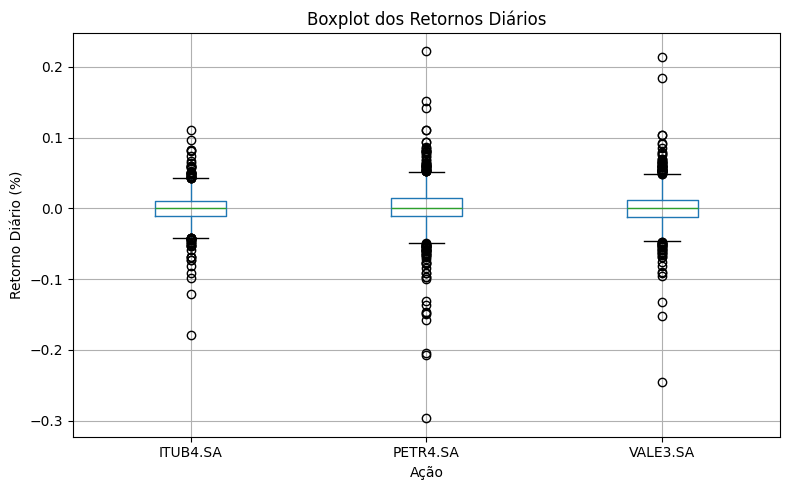

In [ ]:
# Boxplots: este gráfico exibe a distribuição dos retornos diários
# Ele mostra a mediana, quartis, e a presença de outliers (pontos extremos),
# facilitando a comparação visual da centralidade, dispersão e risco
# entre os ativos.
plt.figure(figsize=(8, 5))

retornos.boxplot()

plt.title('Boxplot dos Retornos Diários')
plt.xlabel('Ação')
plt.ylabel('Retorno Diário (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

Podemos usar o boxplot para identificar outliers usando a distância interquartil


In [ ]:
# Este código calcula os limites inferior e superior para identificar outliers
# (retornos diários extremos) na série da VALE3.SA, usando o método do IQR.
# Ele então lista o total e exemplos desses outliers.
serie_vale = retornos['VALE3.SA'].dropna()

Q1 = serie_vale.quantile(0.25)
Q3 = serie_vale.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_vale = serie_vale[(serie_vale < limite_inferior) | (serie_vale > limite_superior)]

print(f"Total de outliers da VALE3.SA: {len(outliers_vale)}")
print(f"Limite inferior: {limite_inferior:.4f}")
print(f"Limite superior: {limite_superior:.4f}")
print("\nExemplos de outliers:")


Total de outliers da VALE3.SA: 83
Limite inferior: -0.0477
Limite superior: 0.0485

Exemplos de outliers:


Vamos transformar o resultado em um df para facilitar a visualização

In [ ]:
# Este código organiza os outliers identificados em um DataFrame fácil de ler,
# com colunas para a 'Data' e o 'Retorno' de cada evento extremo.
outliers_vale_df = outliers_vale.reset_index()
outliers_vale_df.columns = ['Data', 'Retorno']
outliers_vale_df

,Data,Retorno
0,2017-01-10,0.076981
1,2017-01-18,0.050376
2,2017-02-03,-0.062768
3,2017-02-10,0.055341
4,2017-02-13,0.091768
...,...,...
76,2023-09-01,0.058543
77,2024-04-08,0.054597
78,2024-09-24,0.048844
79,2024-09-26,0.060056


In [ ]:
# Matriz de correlação - Calcula e exibe a correlação entre os retornos diários
# de cada par de ativos. Valores próximos a 1 ou -1 indicam forte relação,
# enquanto valores próximos a 0 sugerem pouca ou nenhuma relação linear.

print("\nCorrelação entre os retornos:")
print(retornos.corr())


Correlação entre os retornos:
Ticker    ITUB4.SA  PETR4.SA  VALE3.SA
Ticker                                
ITUB4.SA  1.000000  0.511089  0.311744
PETR4.SA  0.511089  1.000000  0.397880
VALE3.SA  0.311744  0.397880  1.000000


Podemos plotar isso como um heatmap

In [ ]:
retornos.columns

Index(['ITUB4.SA', 'PETR4.SA', 'VALE3.SA'], dtype='object', name='Ticker')

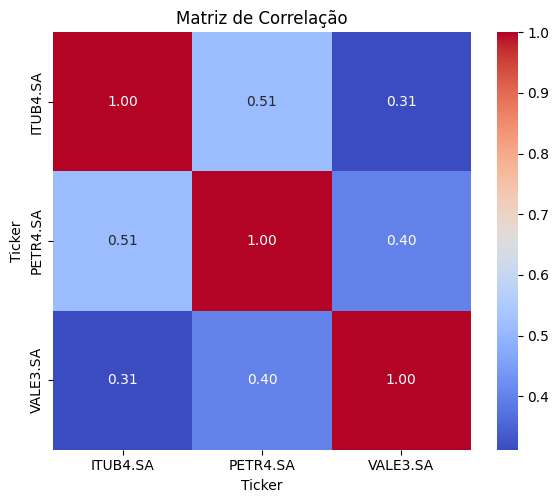

In [ ]:
import seaborn as sns


# Matriz de correlação
correlation = retornos[['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']].corr()

# Heatmap com seaborn
# Este código gera um mapa de calor (heatmap) para visualizar a
# matriz de correlação entre os retornos dos ativos.
# Cores mais quentes/frias indicam correlações
# positivas/negativas mais fortes, respectivamente.
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()